In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import os
print(os.listdir("./data"))

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


In [10]:
df=pd.read_csv("./data/Admission_Predict_Ver1.1.csv")
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [11]:
## Rename the columns to remove all spaces in the variable names
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "Chance of Admit ": "Admission_rate"})

## Also drop the 'Serial No.' variable 
df=df.drop("Serial No.",axis=1)
print("\nData frame after dropping column 'B':")
df.head(10)


Data frame after dropping column 'B':


,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_rate
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


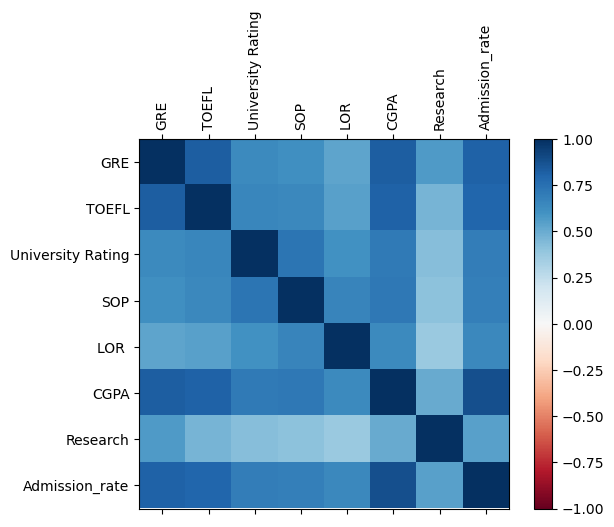

In [20]:
## Create a heatmap of the correlation matrix calculated from the dataframe
corr = df.corr()
fig, ax = plt.subplots()
cax = ax.matshow(corr, cmap='RdBu', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)
plt.show()

c:\Users\23898\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\23898\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\23898\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\23898\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

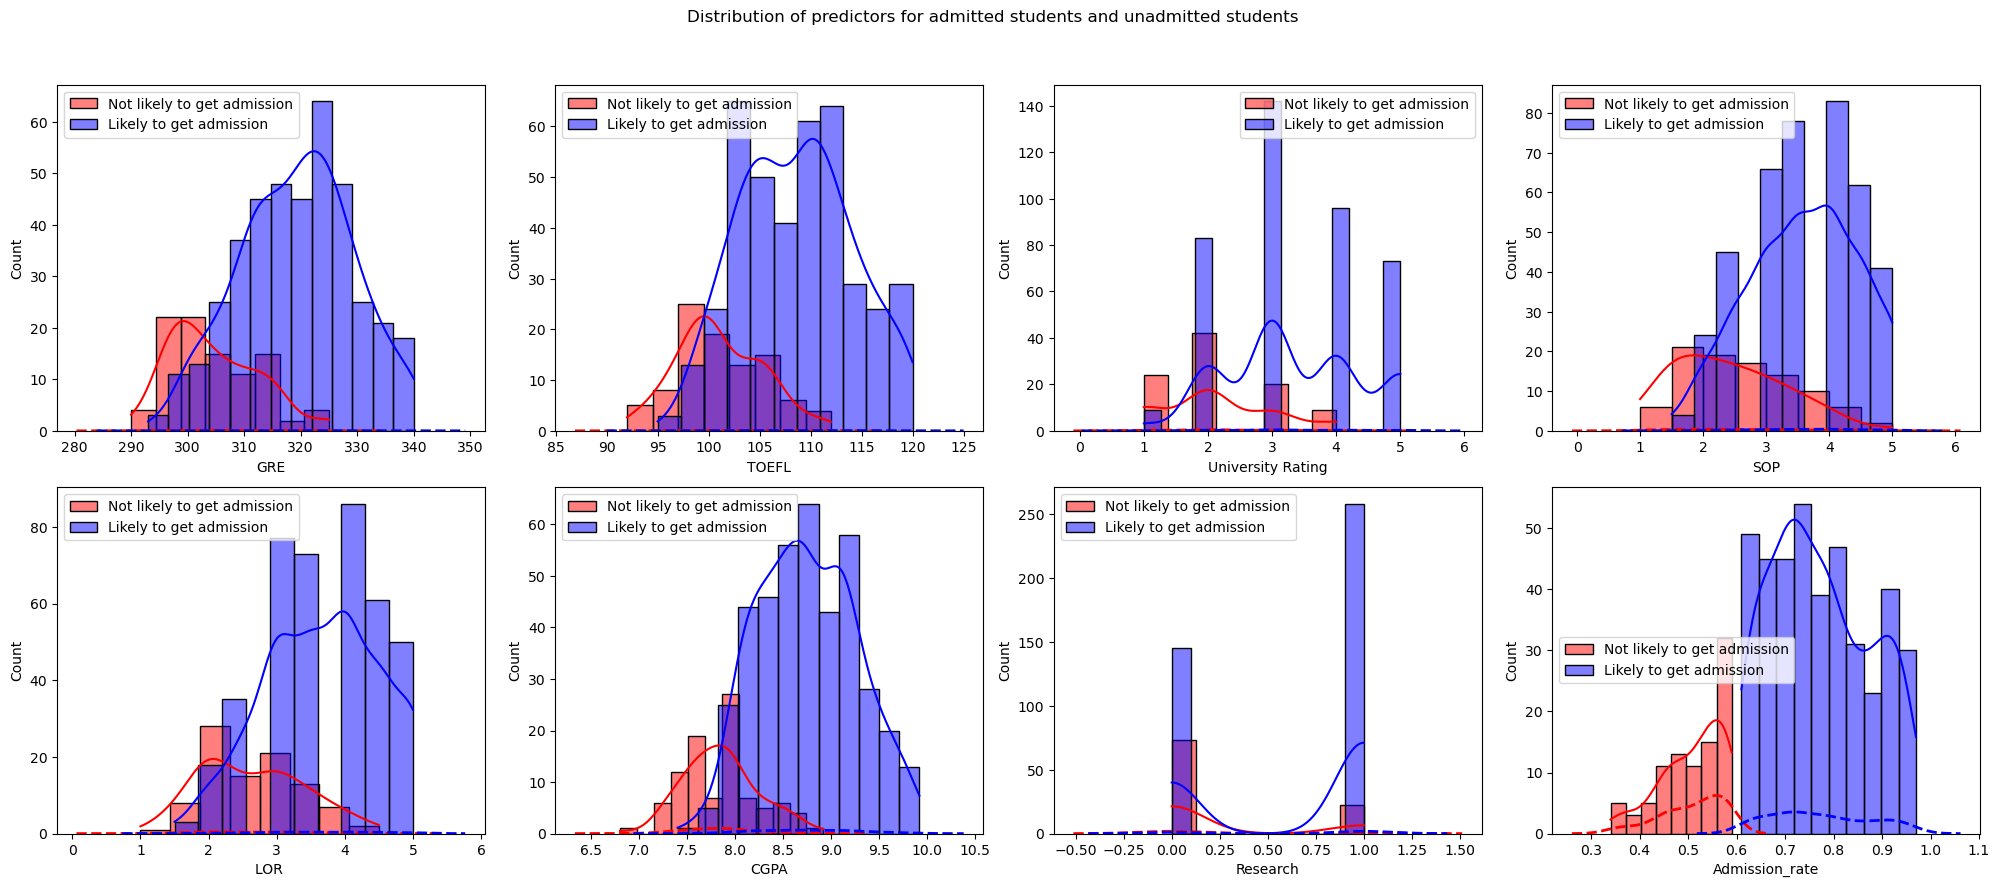

In [35]:
## See how admitted and unadmitted students are distributed for each variable
fig = plt.figure(figsize=(20, 25))
j = 0
for i in df.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    ## I set the threshold to 0.6; an admission rate of greater than 0.6 indicates a likely admission
    sns.histplot(df[i][df['Admission_rate'] < 0.6], color='r', label='Not likely to get admission', kde=True)
    sns.histplot(df[i][df['Admission_rate'] > 0.6], color='b', label='Likely to get admission', kde=True)
    plt.legend(loc='best')
    sns.kdeplot(df[i][df['Admission_rate'] < 0.6], color='r', linestyle='--', linewidth=2)
    sns.kdeplot(df[i][df['Admission_rate'] > 0.6], color='b', linestyle='--', linewidth=2)

fig.suptitle('Distribution of predictors for admitted students and unadmitted students ')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()